In [9]:
import json

# key = 元素组合名称， value = {年份: {o:xx, c:xx}}
with open('element_ald_H.json') as f:
    ald_H = json.load(f)
with open('element_ald_N.json') as f:
    ald_N = json.load(f)
with open('element_ald_O.json') as f:
    ald_O = json.load(f)
with open('element_ald_S.json') as f:
    ald_S = json.load(f)
    
with open('element_nonald_H.json') as f:
    nonald_H = json.load(f)
with open('element_nonald_N.json') as f:
    nonald_N = json.load(f)
with open('element_nonald_O.json') as f:
    nonald_O = json.load(f)
with open('element_nonald_S.json') as f:
    nonald_S = json.load(f)

In [10]:
def return_freq(com, acc_ald_dict, acc_nonald_dict):
    freqs = 0
    for i in acc_ald_dict[com]:
        if 'o' in acc_ald_dict[com][i].keys():
            freqs += acc_ald_dict[com][i]['o']
        if 'c' in acc_ald_dict[com][i].keys():
            freqs += acc_ald_dict[com][i]['c']
    for i in acc_nonald_dict[com]:
        if 'o' in acc_nonald_dict[com][i].keys():
            freqs += acc_nonald_dict[com][i]['o']
        if 'c' in acc_nonald_dict[com][i].keys():
            freqs += acc_nonald_dict[com][i]['c']
    return freqs

In [11]:
def return_dis(keys):
    ele_dict = {}
    count = 0
    for k in keys:
        if '_' in k:
            kp = k.split('_')
            for e in kp:
                if e not in ele_dict.keys():
                    ele_dict[e] = 1
                    count += 1
                else:
                    ele_dict[e] += 1
                    count += 1
        else:
            if k not in ele_dict.keys():
                ele_dict[k] = 1
                count += 1
            else:
                ele_dict[k] += 1
                count += 1
    for e in ele_dict.keys():
        ele_dict[e] = ele_dict[e]/count
    sorted_dis = sorted(ele_dict.items(), key=lambda item:item[1], reverse=True)
    return sorted_dis    

In [12]:
def comparison(ald, nonald):
    both = {}
    only_ald = {}
    only_nonald = {}
    for i in ald.keys():
        ald_year = []
        nonald_year = []
        if ald[i] != {}:
            for year in range(2000, 2022):
                if str(year) in ald[i].keys():
                    ald_year.append(year)
        if nonald[i] !={}:
            for year in range(2000, 2022):
                if str(year) in nonald[i].keys():
                    nonald_year.append(year)
        if ald_year != []:
            if nonald_year != []:
                both[i] = {'ald':ald_year, 'nonald':nonald_year}
            else:
                only_ald[i] = ald_year
        else:
            if nonald_year != []:
                only_nonald[i] = nonald_year
    print('ald', len(both.keys())+len(only_ald.keys()))
    print('nonald', len(both.keys())+len(only_nonald.keys()))
    print('both appeared', len(both.keys()))
    # 最早ald时间，最晚nonald时间
    nonald_ald = {}
    ald_nonald = {}
    for b in both.keys():
        large_cha = both[b]['ald'][0]-both[b]['nonald'][0]
        if large_cha >= 0: # 先nonald再ald
            nonald_ald[b] = {}
            nonald_ald[b]['large_d'] = large_cha
            nonald_ald[b]['early_ald'] = both[b]['ald'][0]
            nonald_ald[b]['early_nonald'] = both[b]['nonald'][0]
        else:
            ald_nonald[b] = {}
            ald_nonald[b]['large_d'] = -large_cha
            ald_nonald[b]['early_ald'] = both[b]['ald'][0]
            ald_nonald[b]['early_nonald'] = both[b]['nonald'][0]
    return only_nonald, nonald_ald, ald_nonald, return_dis(nonald_ald.keys()), return_dis(ald_nonald.keys())

In [13]:
def comparison_2021(ald, nonald):
    both = {}
    only_ald = {}
    only_nonald = {}
    for i in ald.keys():
        ald_year = []
        nonald_year = []
        if ald[i] != {}:
            for year in range(2000, 2021):
                if str(year) in ald[i].keys():
                    ald_year.append(year)
        if nonald[i] !={}:
            for year in range(2000, 2021):
                if str(year) in nonald[i].keys():
                    nonald_year.append(year)
        if ald_year != []:
            if nonald_year != []:
                both[i] = {'ald':ald_year, 'nonald':nonald_year}
            else:
                only_ald[i] = ald_year
        else:
            if nonald_year != []:
                only_nonald[i] = nonald_year
    print('ald', len(both.keys())+len(only_ald.keys()))
    print('nonald', len(both.keys())+len(only_nonald.keys()))
    print('both appeared', len(both.keys()))
    # 最早ald时间，最晚nonald时间
    nonald_ald = {}
    ald_nonald = {}
    for b in both.keys():
        large_cha = both[b]['ald'][0]-both[b]['nonald'][0]
        if large_cha >= 0: # 先nonald再ald
            nonald_ald[b] = {}
            nonald_ald[b]['large_d'] = large_cha
            nonald_ald[b]['early_ald'] = both[b]['ald'][0]
            nonald_ald[b]['early_nonald'] = both[b]['nonald'][0]
        else:
            ald_nonald[b] = {}
            ald_nonald[b]['large_d'] = -large_cha
            ald_nonald[b]['early_ald'] = both[b]['ald'][0]
            ald_nonald[b]['early_nonald'] = both[b]['nonald'][0]
    return only_nonald, nonald_ald, ald_nonald, return_dis(nonald_ald.keys()), return_dis(ald_nonald.keys())

# Accuracy for comparison

In [14]:
no = ['H', 'He', 'C', 'N', 'O', 'F', 'Ne', 'Cl', 'Ar', 'Br', 'Kr', 'I', 'Xe', 'At', 'Rn', 'Fr', 'Ra', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 
      'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 
      'Md', 'No', 'Lr', 'Tc']

In [15]:
# top 10 elements
H_10 = ['P', 'B', 'Co', 'Na', 'V', 'W', 'K', 'Cu', 'Li', 'Zn']
N_10 = ['Ti', 'P', 'B', 'Al', 'Ta', 'W', 'V', 'Zr', 'Si', 'Cu']
O_10 = ['Ti', 'Fe', 'Al', 'P', 'Co', 'La', 'Cu', 'Zn', 'Zr', 'Sn']
S_10 = ['P', 'Cu', 'Sn', 'Zn', 'B', 'Li', 'Se', 'V', 'Ag', 'In']

# 2021 answer
H_an = ['Li_P', 'Li_W', 'B_U', 'F_Mg', 'As_P', 'Ac_P', 'Cl_Ge', 'Er_V', 'Y', 'Er']
N_an = ['F_Li', 'Li_Ti', 'Li_Mn', 'Co_Li', 'Li_Ni', 'I_Li', 'B_Ba', 'B_Hf', 'B_U', 'Ar_C', 'F_Mg', 'F_U', 'Al_Cu', 'Al_Zr', 'Ce_P', 'Mn_Ti', 'Ni_Ti', 'Ti_Zn', 'Co_Mn', 'Mn_Ni', 'Co_Ni', 'Cu_Zr', 'Cu_Pd', 'Ag_Cu', 'I_Zn', 'Ag_Zr', 'Ce_I', 'Ce', 'Pt_W']
O_an = ['Ga_He', 'F_Li', 'Br_Li', 'I_Li', 'Li_W', 'B_Co', 'B_Mo', 'Cl_F', 'Ca_F', 'F_Ti', 'Co_F', 'F_Ni', 'F_Pd', 'Eu_F', 'F_Ho', 'F_Re', 'F_Ir', 'F_Pt', 'F_U', 'Fe_Mg', 'Mg_Nb', 'Mg_Pb', 'Al_Nb', 'Al_Re', 'Ce_P', 'P_Re', 'P_Pu', 'Cl_Co', 'Cl_Pd', 'Ca_Ir', 'Mo_Ti', 'Ge_V', 'Pd_V', 'Ag_V', 'Cr_Nb', 'Fe_Gd', 'Co_I', 'Co_U', 'Nb_Ni', 'Pd_Zn', 'Ga_W', 'Ge_Se', 'Bi_Ge', 'Se_Te', 'Rb', 'Mo_Zr', 'Po_Zr', 'Nb_Pb', 'Pt_Ru', 'Pd_Sn', 'I_Pd', 'Ce_Pd', 'Ho_Pd', 'Pa_Pd', 'Au_In', 'Pt_Sn', 'Au_Sn', 'Ce_I', 'I_Pa', 'Ce_Pt', 'Re_U']
S_an = ['B_Li', 'Br_Li', 'Li_Sn', 'C_Fe', 'C_Co', 'F_Re', 'P_Sn', 'Cu_V', 'Bi_V', 'Cr', 'Co_Zn', 'Bi_Cu', 'Sb_Zn', 'Ag_Se', 'Sb_Se', 'Mo_Zr', 'Ag_Te', 'Cd_Pt', 'Sb_Sn', 'Te', 'Re_U', 'Ra', 'No']

In [29]:
only_nonald, nonald_ald, ald_nonald, nonald_ald_dis, ald_nonald_dis = comparison(ald_S, nonald_S)

ald 223
nonald 988
both appeared 204


In [30]:
# 用2012-2020的预测2021会non_ald转化为ald的non_ald组合，先限制为看是否确实在2021出现了，
tmp_score = {}
for p_set in nonald_ald_dis:
    if p_set[0] not in no:
        tmp_score[p_set[0]] = p_set[1]

candidates = {}
for i in only_nonald.keys():
    if '_' in i:
        i_s = i.split('_')
        tmp = []
        flag = 0
        for e_ in i_s:
            if e_ in tmp_score.keys():
                tmp.append(tmp_score[e_])
            if e_ in S_10:
                flag = 1
        if len(tmp) == 2 and flag == 1:
            candidates[i] = sum(tmp)/len(tmp)
        else:
            candidates[i] = 0
    else:
        if i in tmp_score.keys():
            candidates[i] = tmp_score[i]
        else:
            candidates[i] = 0

sorted_can = sorted(candidates.items(), key=lambda item:item[1], reverse=True)
tmp_print = []
# filter by year: have year > 2012, 
count = 0
for sc in sorted_can:
    flag=0
    for year in only_nonald[sc[0]]:
        if year >= 2012:
            flag = 1
    freq = return_freq(sc[0], ald_S, nonald_S)
    # threshold of freq can be adjusted
    if flag == 1 and freq >=1:
        count += 1
        if count < 51:
            tmp_print.append((sc[0], return_freq(sc[0], ald_S, nonald_S)))
            # print(count, sc[0], round(sc[1]*100,2), only_nonald[sc[0]], return_freq(sc[0], ald_H, nonald_H))
        # print('\n')
print(tmp_print)

[('P_Se', 4), ('P_Ti', 24), ('Cd_P', 12), ('P_Sb', 4), ('P_Sr', 2), ('Mo_P', 27), ('Bi_P', 4), ('Ni_P', 22), ('Na_P', 31), ('P_Te', 5), ('P_Pt', 17), ('P_Pb', 24), ('B_Cu', 5), ('Ca_P', 3), ('Cr_P', 1), ('P_Zr', 5), ('Nb_P', 1), ('Eu_P', 5), ('P_Tb', 1), ('P_Ta', 6), ('Cu_Li', 2), ('Ag_Cu', 21), ('Li_Zn', 1), ('Cu_Ti', 8), ('Cu_K', 19), ('V_Zn', 5), ('Sn_V', 13), ('Cu_Y', 1), ('B_V', 36), ('Ag_Zn', 27), ('Li_Se', 2), ('B_In', 4), ('Ti_Zn', 18), ('Co_Sn', 14), ('Cu_Ge', 26), ('As_Cu', 2), ('Cu_Sr', 3), ('Cs_Cu', 1), ('Li_V', 2), ('B_Ti', 12), ('B_Co', 9), ('Cu_Mg', 4), ('Al_Cu', 30), ('Cu_Si', 2), ('K_Zn', 19), ('K_Sn', 20), ('Cu_Mn', 11), ('Cu_Fe', 54), ('Cu_Ni', 25), ('Ga_Zn', 8)]


In [29]:
tmp_score = {}
for p_set in nonald_ald_dis:
    tmp_score[p_set[0]] = p_set[1]
sorted_score = sorted(tmp_score.items(), key=lambda item:item[1], reverse=True)
top_10 = []
for s in sorted_score:
    if s[0] not in no:
        top_10.append(s[0])
print(top_10[:10])

['P', 'Cu', 'Sn', 'Zn', 'B', 'Li', 'Se', 'V', 'Ag', 'In']


## H

In [10]:
only_nonald, nonald_ald, ald_nonald, nonald_ald_dis, ald_nonald_dis = comparison(ald_H, nonald_H)

ald 149
nonald 688
both appeared 132


In [11]:
print('Some statistics:')
print('Proportion of non_ald --> ald in all the ald combinations: ', len(nonald_ald)/149)
print('Proportion of ald --> nonald in all the nonald combinations: ', len(ald_nonald)/688)
large_d_na = []
for i in nonald_ald.keys():
    large_d_na.append(nonald_ald[i]['large_d'])
print('Averaged time from nonald to ald: ', sum(large_d_na)/len(large_d_na))
large_d_an = []
for i in ald_nonald.keys():
    large_d_an.append(ald_nonald[i]['large_d'])
print('Averaged time from ald to nonald: ', sum(large_d_an)/len(large_d_an))

Some statistics:
Proportion of non_ald --> ald in all the ald combinations:  0.7785234899328859
Proportion of ald --> nonald in all the nonald combinations:  0.023255813953488372
Averaged time from nonald to ald:  9.03448275862069
Averaged time from ald to nonald:  5.75


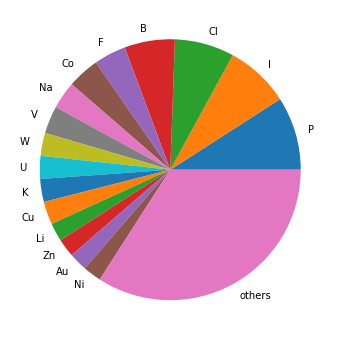

In [12]:
import matplotlib.pyplot as plt

# nonald --> ald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in nonald_ald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
dtname.append(name)
dtnum.append(num)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

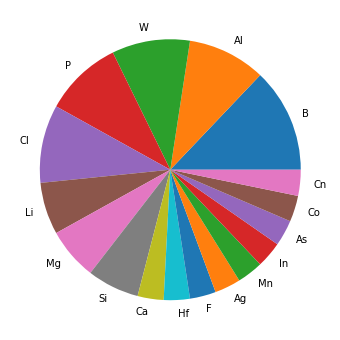

In [13]:
import matplotlib.pyplot as plt

# ald --> nonald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in ald_nonald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
if num != 0:
    dtname.append(name)
    dtnum.append(num)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

In [14]:
# 排行考虑的因素：年份（含有至少2012年及之后的年份）,已有的迁移元素（两者都排在越前越好）
# nonald-->ald推荐组合
tmp_score = {}
for p_set in nonald_ald_dis:
    tmp_score[p_set[0]] = p_set[1]
    
candidates = {}
for i in only_nonald.keys():
    if '_' in i:
        i_s = i.split('_')
        tmp = []
        for e_ in i_s:
            if e_ in tmp_score.keys():
                tmp.append(tmp_score[e_])
        if tmp != []:
            candidates[i] = sum(tmp)/len(tmp)
        else:
            candidates[i] = 0
    else:
        if i in candidates.keys():
            candidates[i] = tmp_score[i]
        else:
            candidates[i] = 0

sorted_can = sorted(candidates.items(), key=lambda item:item[1], reverse=True)

# filter by year: have year > 2012, 
for sc in sorted_can:
    flag=0
    for year in only_nonald[sc[0]]:
        if year >= 2012:
            flag = 1
    freq = return_freq(sc[0], ald_H, nonald_H)
    # threshold of freq can be adjusted
    if flag == 1 and freq >=1:
        print(sc)
        print(only_nonald[sc[0]])
        print(return_freq(sc[0], ald_H, nonald_H))
        print('\n')

('Cr_P', 0.09090909090909091)
[2013, 2021]
3


('P_Sr', 0.09090909090909091)
[2018, 2020]
2


('P_Rh', 0.09090909090909091)
[2018]
1


('Cd_P', 0.09090909090909091)
[2017]
1


('P_Sm', 0.09090909090909091)
[2018]
1


('Gd_P', 0.09090909090909091)
[2021]
1


('P_Po', 0.09090909090909091)
[2013, 2016, 2017]
19


('P_Th', 0.09090909090909091)
[2005, 2012, 2018, 2020]
7


('Np_P', 0.09090909090909091)
[2012]
1


('Am_P', 0.09090909090909091)
[2009, 2014, 2019]
4


('Ds_P', 0.09090909090909091)
[2016]
1


('P_Ts', 0.09090909090909091)
[2012, 2018]
5


('Cl_P', 0.08238636363636365)
[2006, 2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
26


('Cr_I', 0.07954545454545454)
[2000, 2021]
3


('I_Rb', 0.07954545454545454)
[2021]
1


('I_Sb', 0.07954545454545454)
[2019]
1


('I_Tb', 0.07954545454545454)
[2015]
2


('I_Po', 0.07954545454545454)
[2008, 2017]
2


('I_Ts', 0.07954545454545454)
[2020]
1


('Cl_Sr', 0.07386363636363637)
[2019, 2021]
2


('Cd_Cl', 0.07386363636363637)
[2017]
1


('C

## N

In [15]:
only_nonald, nonald_ald, ald_nonald, nonald_ald_dis, ald_nonald_dis = comparison(ald_N, nonald_N)

ald 254
nonald 884
both appeared 227


In [16]:
print('Some statistics:')
print('Proportion of non_ald --> ald in all the ald combinations: ', len(nonald_ald)/254)
print('Proportion of ald --> nonald in all the nonald combinations: ', len(ald_nonald)/884)
large_d_na = []
for i in nonald_ald.keys():
    large_d_na.append(nonald_ald[i]['large_d'])
print('Averaged time from nonald to ald: ', sum(large_d_na)/len(large_d_na))
large_d_an = []
for i in ald_nonald.keys():
    large_d_an.append(ald_nonald[i]['large_d'])
print('Averaged time from ald to nonald: ', sum(large_d_an)/len(large_d_an))

Some statistics:
Proportion of non_ald --> ald in all the ald combinations:  0.7992125984251969
Proportion of ald --> nonald in all the nonald combinations:  0.027149321266968326
Averaged time from nonald to ald:  8.738916256157635
Averaged time from ald to nonald:  5.625


[6.9164265129683, 6.9164265129683, 6.051873198847262, 5.475504322766571, 4.899135446685879, 3.7463976945244957, 3.7463976945244957, 2.881844380403458, 2.881844380403458, 2.881844380403458, 2.5936599423631126, 2.5936599423631126, 2.5936599423631126, 2.3054755043227666, 2.3054755043227666, 2.0172910662824206, 2.0172910662824206, 2.0172910662824206, 2.0172910662824206, 33.141210374639805]


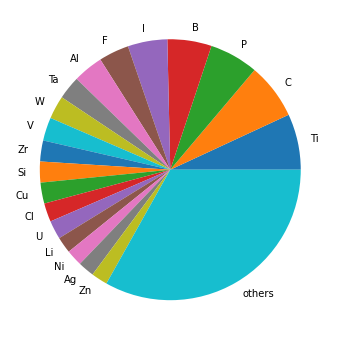

In [17]:
# nonald --> ald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in nonald_ald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
dtname.append(name)
dtnum.append(num)
print(dtnum)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

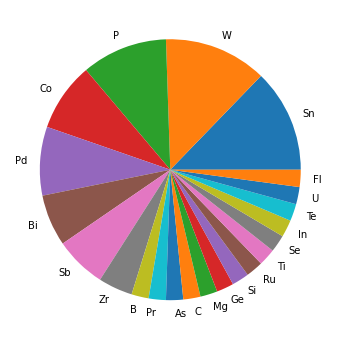

In [126]:
# ald --> nonald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in ald_nonald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
if num != 0:
    dtname.append(name)
    dtnum.append(num)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

In [127]:
# 排行考虑的因素：年份（含有至少2012年及之后的年份）,已有的迁移元素（两者都排在越前越好）
# nonald-->ald推荐组合
tmp_score = {}
for p_set in nonald_ald_dis:
    tmp_score[p_set[0]] = p_set[1]
    
candidates = {}
for i in only_nonald.keys():
    if '_' in i:
        i_s = i.split('_')
        tmp = []
        for e_ in i_s:
            if e_ in tmp_score.keys():
                tmp.append(tmp_score[e_])
        if tmp != []:
            candidates[i] = sum(tmp)/len(tmp)
        else:
            candidates[i] = 0
    else:
        if i in candidates.keys():
            candidates[i] = tmp_score[i]
        else:
            candidates[i] = 0

sorted_can = sorted(candidates.items(), key=lambda item:item[1], reverse=True)

# filter by year: have year > 2012, 
for sc in sorted_can:
    flag=0
    for year in only_nonald[sc[0]]:
        if year >= 2012:
            flag = 1
    freq = return_freq(sc[0], ald_N, nonald_N)
    # threshold of freq can be adjusted
    if flag == 1 and freq >=1:
        print(sc)
        print(only_nonald[sc[0]])
        print(freq)
        print('\n')

('C_Rh', 0.069164265129683)
[2011, 2015, 2016]
10


('C_Cs', 0.069164265129683)
[2011, 2016, 2018, 2019]
7


('C_Eu', 0.069164265129683)
[2016, 2018]
3


('C_Tm', 0.069164265129683)
[2016]
1


('C_Re', 0.069164265129683)
[2019, 2021]
2


('C_Os', 0.069164265129683)
[2006, 2014, 2015, 2018]
14


('C_Ir', 0.069164265129683)
[2002, 2010, 2011, 2012, 2016]
6


('C_Rn', 0.069164265129683)
[2016]
1


('C_Th', 0.069164265129683)
[2013, 2019]
2


('C_Pa', 0.069164265129683)
[2020]
2


('C_Es', 0.069164265129683)
[2002, 2014]
4


('C_Ds', 0.069164265129683)
[2008, 2018, 2019, 2020]
18


('C_Cn', 0.069164265129683)
[2018]
2


('Lr_Ti', 0.069164265129683)
[2021]
1


('P_Rh', 0.06051873198847262)
[2015, 2018, 2020]
5


('Cd_P', 0.06051873198847262)
[2014]
1


('Cs_P', 0.06051873198847262)
[2012, 2017, 2019, 2020]
5


('P_Sm', 0.06051873198847262)
[2020]
4


('Dy_P', 0.06051873198847262)
[2018]
1


('Ir_P', 0.06051873198847262)
[2013, 2015]
2


('Ac_P', 0.06051873198847262)
[2006, 2008, 2011, 2012,

## O

In [27]:
only_nonald, nonald_ald, ald_nonald, nonald_ald_dis, ald_nonald_dis = comparison(ald_O, nonald_O)

ald 634
nonald 1642
both appeared 583


In [137]:
print('Some statistics:')
print('Proportion of non_ald --> ald in all the ald combinations: ', len(nonald_ald)/634)
print('Proportion of ald --> nonald in all the nonald combinations: ', len(ald_nonald)/1642)
large_d_na = []
for i in nonald_ald.keys():
    large_d_na.append(nonald_ald[i]['large_d'])
print('Averaged time from nonald to ald: ', sum(large_d_na)/len(large_d_na))
large_d_an = []
for i in ald_nonald.keys():
    large_d_an.append(ald_nonald[i]['large_d'])
print('Averaged time from ald to nonald: ', sum(large_d_an)/len(large_d_an))

Some statistics:
Proportion of non_ald --> ald in all the ald combinations:  0.8675078864353313
Proportion of ald --> nonald in all the nonald combinations:  0.020097442143727162
Averaged time from nonald to ald:  9.545454545454545
Averaged time from ald to nonald:  4.515151515151516


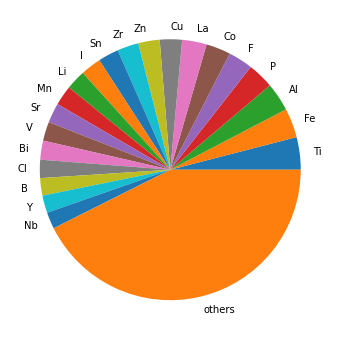

In [138]:
# nonald --> ald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in nonald_ald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
dtname.append(name)
dtnum.append(num)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

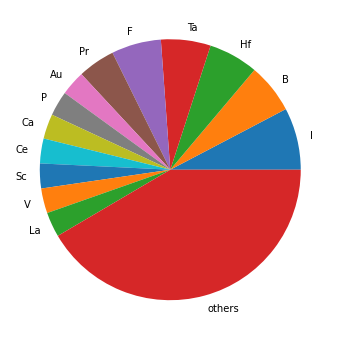

In [139]:
# ald --> nonald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in ald_nonald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
if num != 0:
    dtname.append(name)
    dtnum.append(num)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

In [140]:
# 排行考虑的因素：年份（含有至少2012年及之后的年份）,已有的迁移元素（两者都排在越前越好）
# nonald-->ald推荐组合
tmp_score = {}
for p_set in nonald_ald_dis:
    tmp_score[p_set[0]] = p_set[1]
    
candidates = {}
for i in only_nonald.keys():
    if '_' in i:
        i_s = i.split('_')
        tmp = []
        for e_ in i_s:
            if e_ in tmp_score.keys():
                tmp.append(tmp_score[e_])
        if tmp != []:
            candidates[i] = sum(tmp)/len(tmp)
        else:
            candidates[i] = 0
    else:
        if i in candidates.keys():
            candidates[i] = tmp_score[i]
        else:
            candidates[i] = 0

sorted_can = sorted(candidates.items(), key=lambda item:item[1], reverse=True)

# filter by year: have year > 2012, 
for sc in sorted_can:
    flag=0
    for year in only_nonald[sc[0]]:
        if year >= 2012:
            flag = 1
    freq = return_freq(sc[0], ald_O, nonald_O)
    # threshold of freq can be adjusted
    if flag == 1 and freq >=1:
        print(sc)
        print(only_nonald[sc[0]])
        print(freq)
        print('\n')

('Tc_Ti', 0.040235525024533855)
[2015]
1


('Th_Ti', 0.040235525024533855)
[2019, 2020]
2


('Fe_Th', 0.03631010794896958)
[2011, 2021]
2


('Fe_Hs', 0.03631010794896958)
[2020]
8


('Al_Th', 0.03532875368007851)
[2012]
1


('P_Tc', 0.0323846908734053)
[2015]
1


('P_Th', 0.0323846908734053)
[2011, 2012, 2013, 2020, 2021]
5


('Es_P', 0.0323846908734053)
[2021]
3


('Hs_P', 0.0323846908734053)
[2002, 2016]
2


('La_P', 0.031403336604514234)
[2005, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2016, 2017, 2018, 2020]
33


('F_La', 0.03042198233562316)
[2007, 2011, 2012, 2017, 2018]
7


('F_Th', 0.03042198233562316)
[2015]
1


('Co_Th', 0.03042198233562316)
[2002, 2021]
2


('Al_V', 0.029440628066732092)
[2001, 2004, 2005, 2008, 2010, 2012, 2014, 2015, 2017, 2018, 2019, 2020, 2021]
39


('Al_Bi', 0.029440628066732092)
[2011, 2012, 2013, 2014, 2015, 2016, 2019, 2020]
22


('Ga_Ti', 0.02944062806673209)
[2008, 2013, 2016, 2017, 2019, 2020]
12


('Co_Cu', 0.028949950932286556)
[2000, 2001, 2002


('K_Mo', 0.01324828263002944)
[2012, 2014, 2020]
17


('In_K', 0.01324828263002944)
[2015]
1


('Br_V', 0.01324828263002944)
[2020]
1


('Cs_V', 0.01324828263002944)
[2009, 2010, 2017, 2021]
8


('Ts_V', 0.01324828263002944)
[2014]
1


('Ho_Mn', 0.01324828263002944)
[2009, 2016]
4


('Lu_Mn', 0.01324828263002944)
[2015, 2018, 2021]
3


('I_Rb', 0.01324828263002944)
[2021]
1


('Ho_Sr', 0.01324828263002944)
[2016]
2


('Pa_Sr', 0.01324828263002944)
[2019]
1


('Pt_Ta', 0.01324828263002944)
[2013]
1


('He_V', 0.012757605495583905)
[2017]
1


('Li_Rb', 0.012757605495583905)
[2019]
1


('Li_Os', 0.012757605495583905)
[2019, 2020]
3


('B_Sm', 0.012757605495583905)
[2005, 2018, 2019]
3


('B_Eu', 0.012757605495583905)
[2018, 2021]
5


('Mo_Na', 0.012757605495583905)
[2008, 2011, 2013, 2014, 2015, 2016, 2020, 2021]
34


('Gd_Na', 0.012757605495583905)
[2014, 2015]
3


('Mg_Pd', 0.012757605495583905)
[2006, 2014]
2


('Br_Cl', 0.012757605495583905)
[2004, 2005, 2014]
3


('Cl_Cs', 0.0127576

## S

In [29]:
only_nonald, nonald_ald, ald_nonald, nonald_ald_dis, ald_nonald_dis = comparison(ald_S, nonald_S)

ald 223
nonald 988
both appeared 204


In [30]:
tmp = []
for dts in nonald_ald_dis[:10]:
    tmp.append(dts[0])
print(tmp)

['P', 'I', 'C', 'Cu', 'Sn', 'Zn', 'B', 'F', 'Li', 'Se']


In [143]:
print('Some statistics:')
print('Proportion of non_ald --> ald in all the ald combinations: ', len(nonald_ald)/233)
print('Proportion of ald --> nonald in all the nonald combinations: ', len(ald_nonald)/988)
large_d_na = []
for i in nonald_ald.keys():
    large_d_na.append(nonald_ald[i]['large_d'])
print('Averaged time from nonald to ald: ', sum(large_d_na)/len(large_d_na))
large_d_an = []
for i in ald_nonald.keys():
    large_d_an.append(ald_nonald[i]['large_d'])
print('Averaged time from ald to nonald: ', sum(large_d_an)/len(large_d_an))

Some statistics:
Proportion of non_ald --> ald in all the ald combinations:  0.8111587982832618
Proportion of ald --> nonald in all the nonald combinations:  0.015182186234817813
Averaged time from nonald to ald:  9.28042328042328
Averaged time from ald to nonald:  5.333333333333333


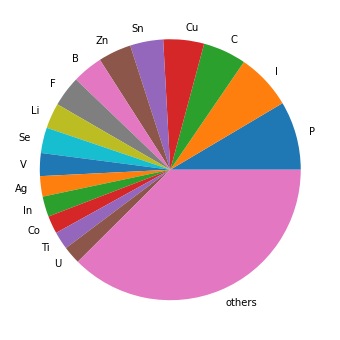

In [144]:
# nonald --> ald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in nonald_ald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
dtname.append(name)
dtnum.append(num)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

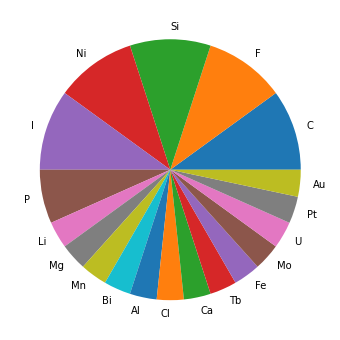

In [145]:
# ald --> nonald的元素distribution （只包含占比>2%的）
dtname = []
dtnum = []
name = 'others'
num = 0
for dts in ald_nonald_dis:
    if dts[1] >0.02:
        dtname.append(dts[0])
        dtnum.append(dts[1]*100)
    else:
        num += dts[1]*100
if num != 0:
    dtname.append(name)
    dtnum.append(num)
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

In [146]:
# 排行考虑的因素：年份（含有至少2012年及之后的年份）,已有的迁移元素（两者都排在越前越好）
# nonald-->ald推荐组合
tmp_score = {}
for p_set in nonald_ald_dis:
    tmp_score[p_set[0]] = p_set[1]
    
candidates = {}
for i in only_nonald.keys():
    if '_' in i:
        i_s = i.split('_')
        tmp = []
        for e_ in i_s:
            if e_ in tmp_score.keys():
                tmp.append(tmp_score[e_])
        if tmp != []:
            candidates[i] = sum(tmp)/len(tmp)
        else:
            candidates[i] = 0
    else:
        if i in candidates.keys():
            candidates[i] = tmp_score[i]
        else:
            candidates[i] = 0

sorted_can = sorted(candidates.items(), key=lambda item:item[1], reverse=True)

# filter by year: have year > 2012, 
for sc in sorted_can:
    flag=0
    for year in only_nonald[sc[0]]:
        if year >= 2012:
            flag = 1
    freq = return_freq(sc[0], ald_S, nonald_S)
    # threshold of freq can be adjusted
    if flag == 1 and freq >=1:
        print(sc)
        print(only_nonald[sc[0]])
        print(freq)
        print('\n')

('Ne_P', 0.08517350157728706)
[2015]
1


('P_Ru', 0.08517350157728706)
[2015, 2016]
2


('P_Pd', 0.08517350157728706)
[2007, 2012, 2013, 2020]
5


('Ce_P', 0.08517350157728706)
[2003, 2017]
3


('P_Yb', 0.08517350157728706)
[2012]
1


('Ir_P', 0.08517350157728706)
[2016, 2020]
2


('P_Th', 0.08517350157728706)
[2019, 2021]
4


('Am_P', 0.08517350157728706)
[2009, 2012, 2014, 2016, 2019, 2021]
7


('Es_P', 0.08517350157728706)
[2021]
1


('Cn_P', 0.08517350157728706)
[2012]
1


('Fl_P', 0.08517350157728706)
[2014, 2016]
4


('I_Ru', 0.0694006309148265)
[2016, 2021]
2


('I_Pd', 0.0694006309148265)
[2019, 2020]
5


('Ce_I', 0.0694006309148265)
[2017, 2018, 2019]
3


('I_Yb', 0.0694006309148265)
[2012]
1


('I_Th', 0.0694006309148265)
[2005, 2017]
5


('I_Np', 0.0694006309148265)
[2021]
1


('Am_I', 0.0694006309148265)
[2009, 2012, 2016, 2021]
4


('Es_I', 0.0694006309148265)
[2005, 2017]
2


('I_Rg', 0.0694006309148265)
[2015]
1


('P_Se', 0.0583596214511041)
[2015, 2016, 2020]
4


('I_S